# Air Quality in São Paulo state between 2013 and 2020

In [1]:
import datetime
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose

%matplotlib inline

In [2]:
warnings.simplefilter(action='ignore')

sns.set(rc={'figure.figsize':(15, 6)})

sns.set_style('white', {
    'axes.spines.left': True,
    'axes.spines.bottom': True,
    'axes.spines.right': False,
    'axes.spines.top': False
})

In [3]:
df = pd.read_csv('data/sp_air_quality.csv', parse_dates=['Datetime'])

In [4]:
df.head()

,Datetime,Station,Benzene,CO,PM10,PM2.5,NO2,O3,SO2,Toluene,TRS
0,2013-05-08 01:00:00,Araçatuba,NaN,NaN,30.0,NaN,NaN,7.0,NaN,NaN,NaN
1,2013-05-08 02:00:00,Araçatuba,NaN,NaN,30.0,NaN,NaN,6.0,NaN,NaN,NaN
2,2013-05-08 03:00:00,Araçatuba,NaN,NaN,31.0,NaN,NaN,6.0,NaN,NaN,NaN
3,2013-05-08 04:00:00,Araçatuba,NaN,NaN,31.0,NaN,NaN,4.0,NaN,NaN,NaN
4,2013-05-08 05:00:00,Araçatuba,NaN,NaN,32.0,NaN,NaN,4.0,NaN,NaN,NaN


In [5]:
df.shape

(3445260, 11)

In [6]:
df.tail()

,Datetime,Station,Benzene,CO,PM10,PM2.5,NO2,O3,SO2,Toluene,TRS
3445255,2020-09-09 20:00:00,Taubaté,NaN,NaN,32.0,38.0,4.0,51.0,NaN,NaN,NaN
3445256,2020-09-09 21:00:00,Taubaté,NaN,NaN,32.0,38.0,3.0,40.0,NaN,NaN,NaN
3445257,2020-09-09 22:00:00,Taubaté,NaN,NaN,32.0,38.0,4.0,35.0,NaN,NaN,NaN
3445258,2020-09-09 23:00:00,Taubaté,NaN,NaN,33.0,38.0,6.0,30.0,NaN,NaN,NaN
3445259,2020-09-09 00:00:00,Taubaté,NaN,NaN,33.0,38.0,6.0,24.0,NaN,NaN,NaN


In [7]:
pd.unique(df['Station'])

array(['Araçatuba', 'Araraquara', 'Bauru', 'Campinas-Centro',
       'Capão Redondo', 'Carapicuíba', 'Catanduva', 'Cerqueira César',
       'Cid.Universitária-USP-Ipen', 'Congonhas', 'Cubatão-Centro',
       'Cubatão-V.Parisi', 'Cubatão-Vale do Mogi', 'Grajaú-Parelheiros',
       'Guarulhos-Paço Municipal', 'Ibirapuera', 'Interlagos',
       'Itaim Paulista', 'Itaquera', 'Jacareí', 'Jaú', 'Jundiaí',
       'Marg.Tietê-Pte Remédios', 'Marília', 'Mauá', 'Mooca',
       'N.Senhora do Ó', 'Osasco', 'Parque D.Pedro II', 'Paulínia',
       'Pinheiros', 'Piracicaba', 'Presidente Prudente',
       'S.André-Capuava', 'S.Bernardo-Paulicéia', 'S.José Campos',
       'Santa Gertrudes', 'Santana', 'Santo Amaro', 'Santos',
       'Santos-Ponta da Praia', 'São Caetano do Sul',
       'São José do Rio Preto', 'Sorocaba', 'Taboão da Serra', 'Tatuí',
       'Diadema', 'S.Bernardo-Centro', 'Campinas-V.União',
       'S.José Campos-Vista Verde', 'Campinas-Taquaral',
       'S.José Campos-Jd.Satelite', 'Gu

In [8]:
pollutants = ['Benzene', 'CO', 'PM10', 'PM2.5', 'NO2', 'O3', 'SO2', 'Toluene', 'TRS']

In [9]:
# Thresholds of good quality air
thresholds = {
    'PM10': 50,
    'PM2.5': 25,
    'O3': 100,
    'CO': 9,
    'NO2': 200,
    'SO2': 20
}

In [10]:
# São Paulo city stations
saopaulo_stations = ['Cerqueira César', 'Cid.Universitária-USP-Ipen', 'Ibirapuera', 'Interlagos',
        'Itaim Paulista', 'Itaquera', 'Marg.Tietê-Pte Remédios', 'Mooca', 'N.Senhora do Ó', 
        'Parque D.Pedro II', 'Pinheiros', 'Santana', 'Santo Amaro', 'Pico do Jaraguá', 'Perus']

## Quality air in São Paulo city

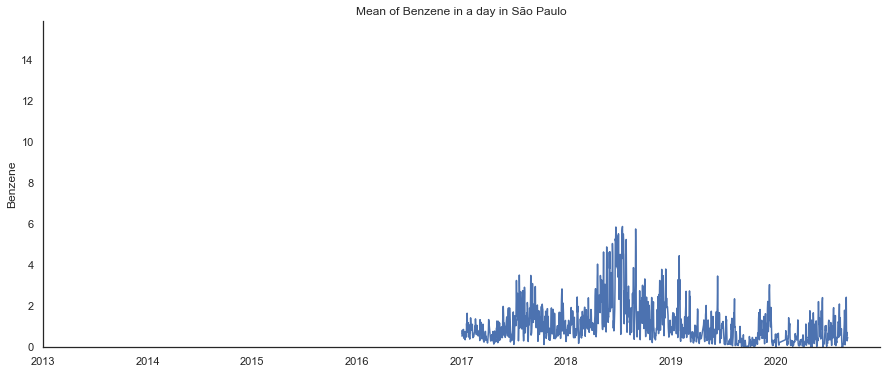

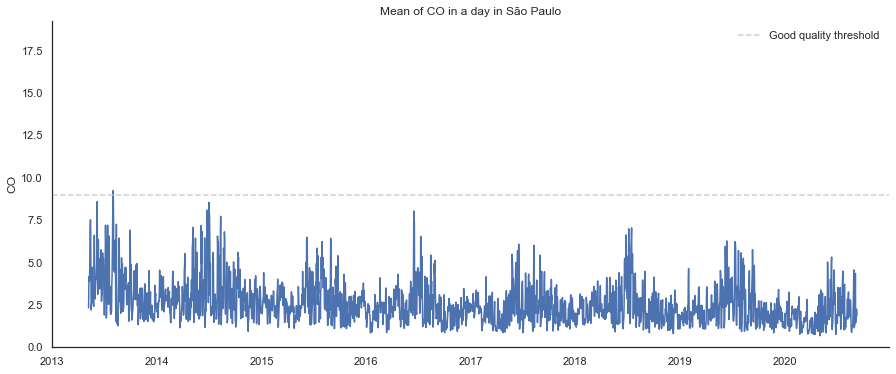

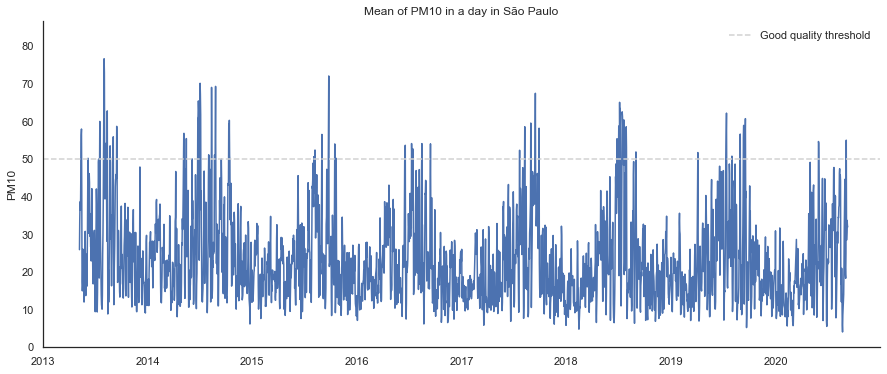

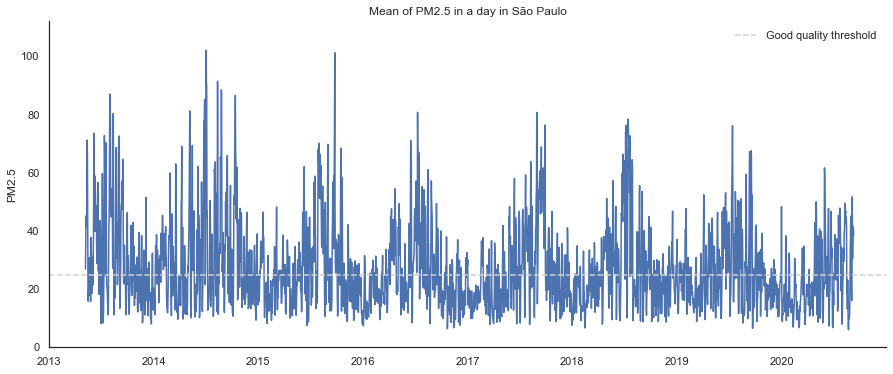

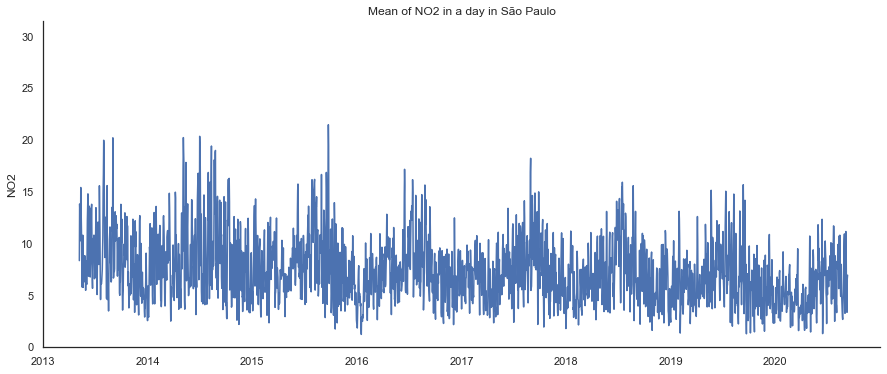

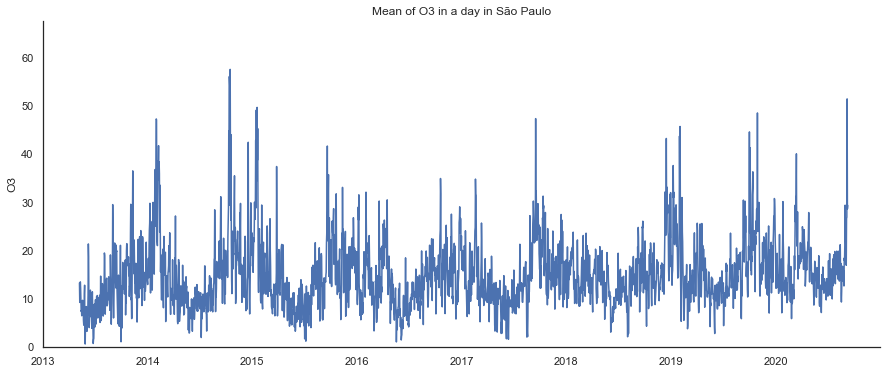

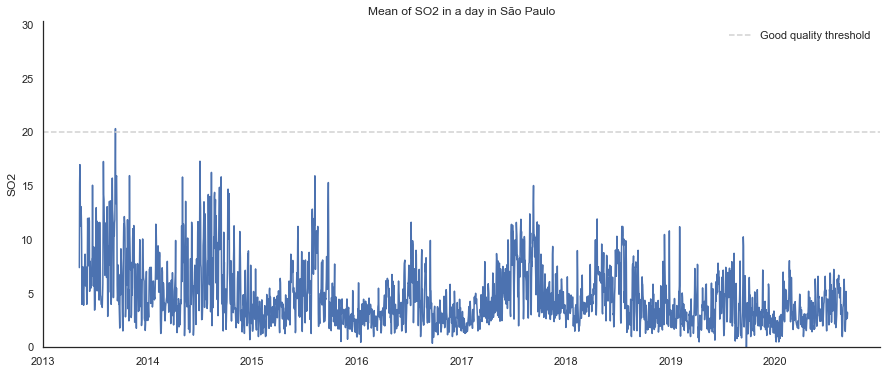

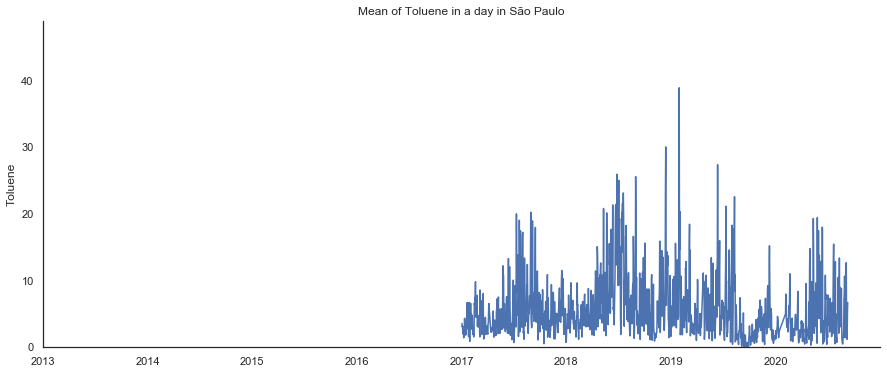

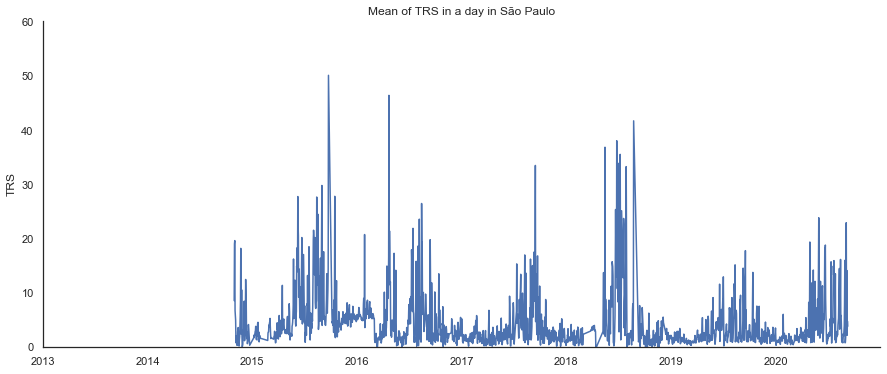

In [11]:
for pollutant in pollutants:
    filtered = df[df['Station'].isin(saopaulo_stations)][['Datetime', pollutant]].dropna()
    grouped = filtered.groupby('Datetime').mean().reset_index()
    grouped = grouped.resample('d', on='Datetime').mean().reset_index()

    ax = sns.lineplot(x='Datetime', y=pollutant, data=grouped, c=sns.color_palette('deep')[0])
    
    plt.title('Mean of ' + pollutant + ' in a day in São Paulo')

    plt.xlabel('')
    
    max_lim = np.max(grouped[pollutant] + 10)
    
    plt.xlim(datetime.date(2013, 1, 1), datetime.date(2020, 12, 31))
    plt.ylim(0, max_lim)
    
    if pollutant in thresholds and thresholds[pollutant] < max_lim:
        ax.axhline(thresholds[pollutant], ls='--', label='Good quality threshold', c=sns.color_palette('Greys')[1])

        plt.legend(frameon=False)

    plt.show()
    print('')

## Decomposing the time series of the pollutants in São Paulo city between 2013 and 2020

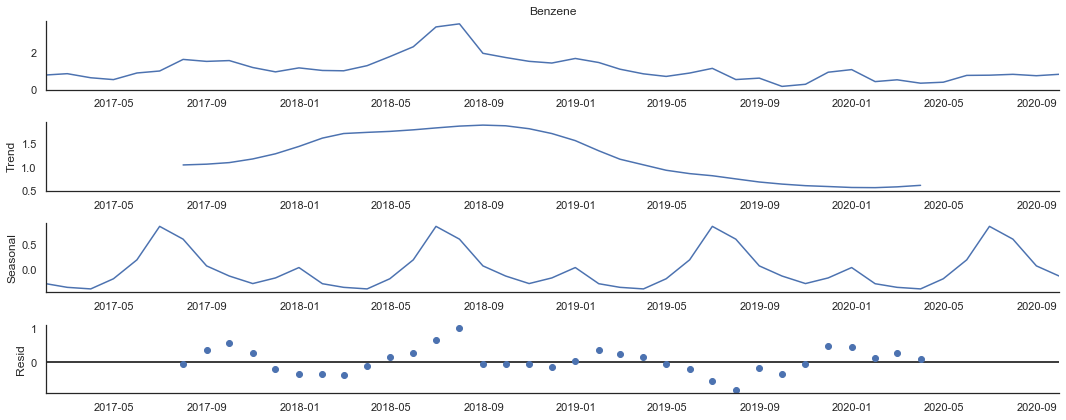

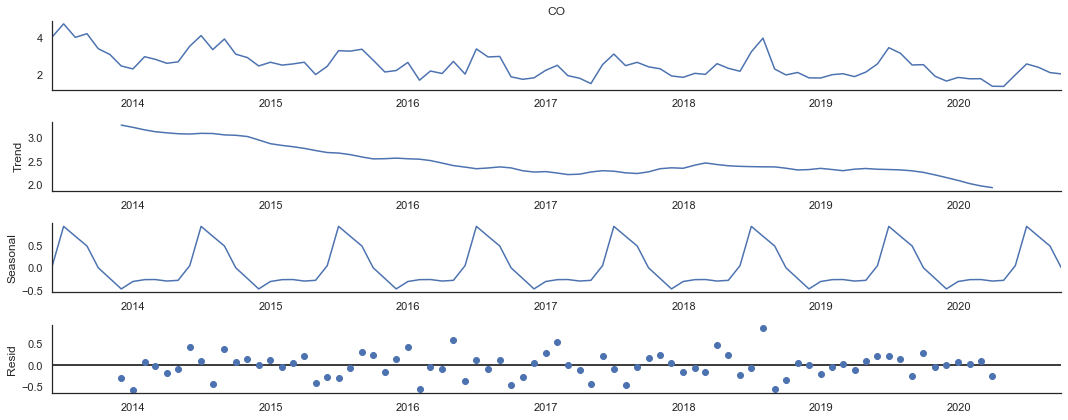

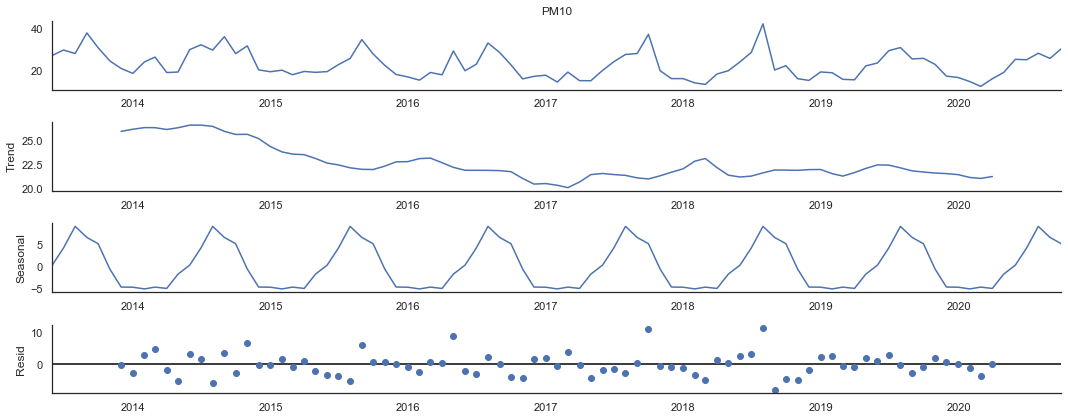

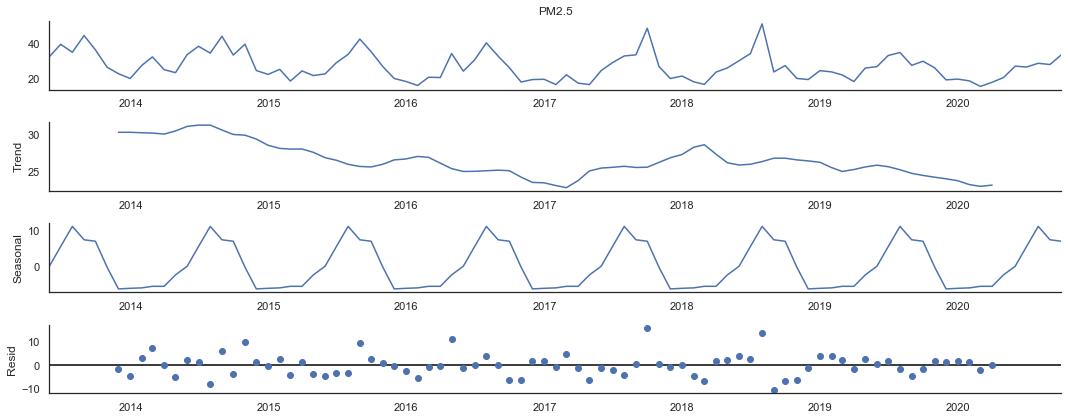

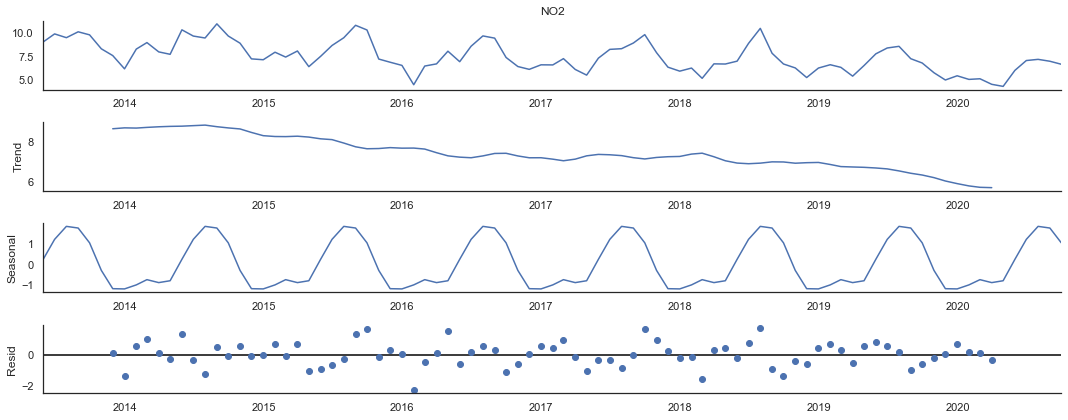

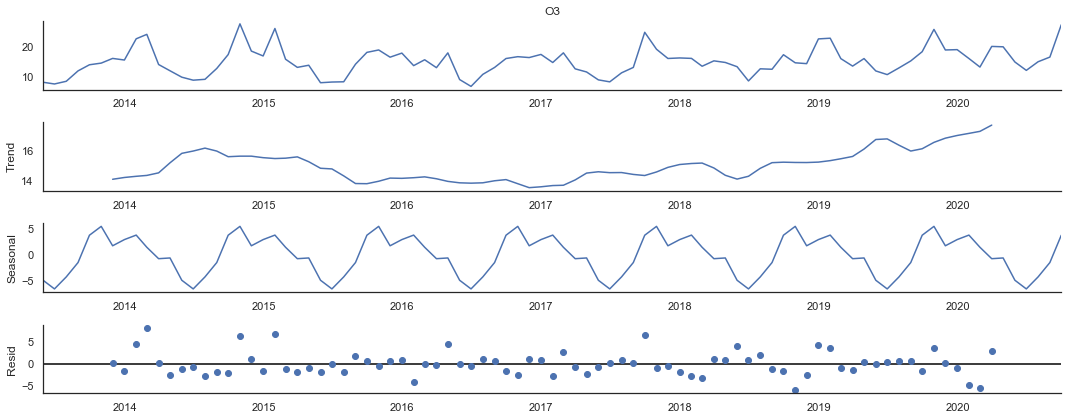

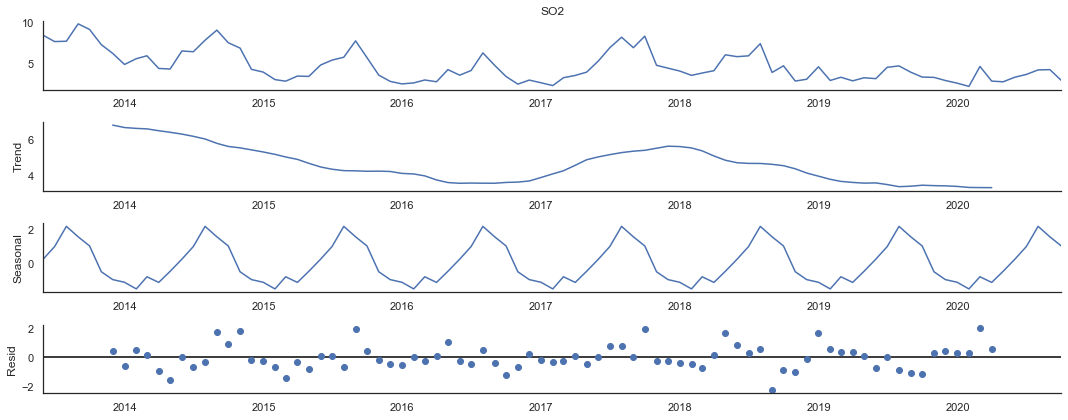

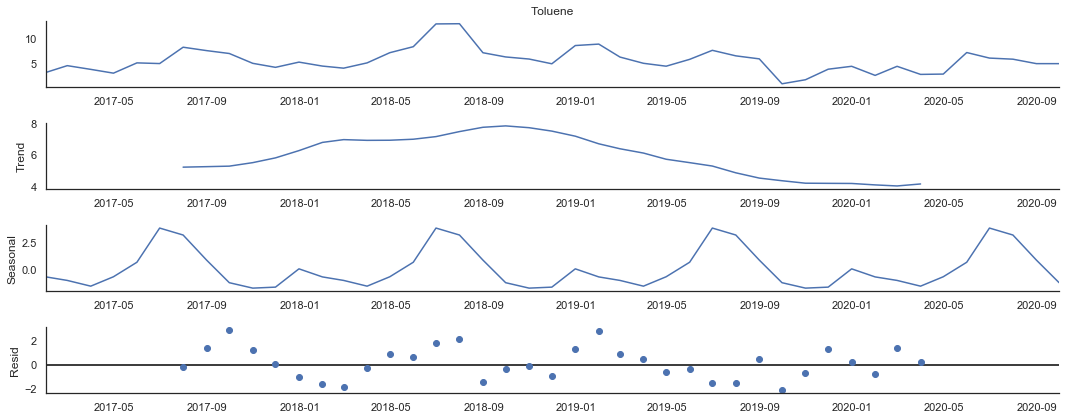

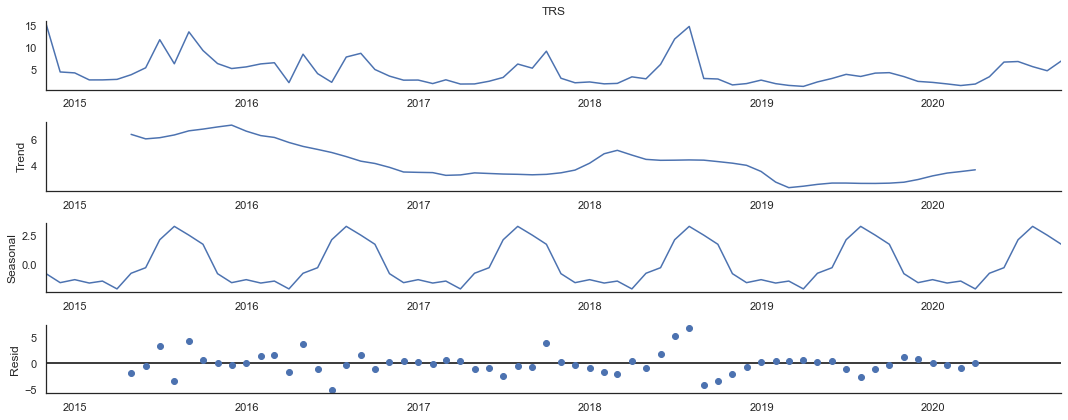

In [12]:
for pollutant in pollutants:
    filtered = df[df['Station'].isin(saopaulo_stations)][['Datetime', pollutant]].dropna()
    grouped = filtered.groupby('Datetime').mean().reset_index()
    grouped = grouped.resample('m', on='Datetime').mean().reset_index()

    series = pd.Series(grouped[pollutant])
    series.index = grouped['Datetime']

    result = seasonal_decompose(series, model='linear')
    result.plot()
    plt.show()
    print('')
    